## Data exploration 

### Check folders length and stage_2_train 

In [1]:
import os
import pydicom
from pathlib import Path
from collections import Counter
from tqdm import tqdm


image_dir = Path("/home/tibia/Projet_Hemorragie/Classification/RSNA2019_Intracranial-Hemorrhage-Detection/2DNet/data/rsna-intracranial-hemorrhage-detection/stage_2_train")


all_files = list(image_dir.glob("*"))
print(f"Nombre total de fichiers : {len(all_files)}")
extensions = [f.suffix.lower() for f in all_files]

ext_counter = Counter(extensions)
print("Répartition des extensions de fichiers :")
for ext, count in ext_counter.items():
    print(f"{ext or '[sans extension]'} : {count}")



Nombre total de fichiers : 752803
Répartition des extensions de fichiers :
.dcm : 752803


In [2]:
import pandas as pd
from pathlib import Path

# Paths
csv_dir = Path("/home/tibia/Projet_Hemorragie/Classification/RSNA2019_Intracranial-Hemorrhage-Detection/2DNet/data/csv")
dicom_dir = Path("/home/tibia/Projet_Hemorragie/Classification/RSNA2019_Intracranial-Hemorrhage-Detection/2DNet/data/rsna-intracranial-hemorrhage-detection/stage_2_train")

# Load CSV files
train_df = pd.read_csv(csv_dir / "train_fold0.csv")
val_df = pd.read_csv(csv_dir / "val_fold0.csv")


def check_files_exist(filenames, dicom_path):
    missing = []
    for fname in filenames:
        full_path = dicom_path / fname
        if not full_path.exists():
            missing.append(fname)
    return missing

# Vérification
train_missing = check_files_exist(train_df['filename'], dicom_dir)
val_missing = check_files_exist(val_df['filename'], dicom_dir)

# Affichage des résultats
print(f"Total images dans le train fold : {len(train_df)}")
print(f"Fichiers manquants dans le train fold : {len(train_missing)}")
if train_missing:
    print("Exemples :", train_missing[:5])

print(f"\nTotal images dans le val fold : {len(val_df)}")
print(f"Fichiers manquants dans le val fold : {len(val_missing)}")
if val_missing:
    print("Exemples :", val_missing[:5])


Total images dans le train fold : 539469
Fichiers manquants dans le train fold : 0

Total images dans le val fold : 134788
Fichiers manquants dans le val fold : 0


### Loading of .dcm 

In [18]:
from monai.transforms import LoadImage
from pathlib import Path
import pandas as pd

csv_path = "/home/tibia/Projet_Hemorragie/Classification/RSNA2019_Intracranial-Hemorrhage-Detection/2DNet/data/csv/train_fold0.csv"
dicom_dir = "/home/tibia/Projet_Hemorragie/Classification/RSNA2019_Intracranial-Hemorrhage-Detection/2DNet/data/rsna-intracranial-hemorrhage-detection/stage_2_train"

def get_first_dicom_path(csv_path, dicom_dir):
    df = pd.read_csv(csv_path)
    first_filename = df.iloc[0]['filename']  # e.g. "ID_xxxx.dcm"
    return Path(dicom_dir) / first_filename


dcm_path= get_first_dicom_path(csv_path, dicom_dir)

def get_id(img_dicom):
    dcm = pydicom.dcmread(dcm_path) 
    return getattr(dcm, "SOPInstanceUID", None)

test= get_id(pydicom.dcmread(dcm_path))
print(test)
from pathlib import Path

def get_first_dicom_path(csv_path, dicom_dir):
    df = pd.read_csv(csv_path)
    first_filename = df.iloc[0]['filename']  
    return Path(dicom_dir) / first_filename



def load_first_dicom_from_fold0(csv_path, dicom_dir):
    """
    Load the first DICOM from the train fold 0 CSV using MONAI's LoadImage.
    
    Args:
        csv_path (str or Path): Path to train_fold0.csv
        dicom_dir (str or Path): Path to the DICOM directory (stage_2_train)
    
    Returns:
        image (torch.Tensor): Loaded image tensor
        meta (dict): Metadata from MONAI LoadImage
    """
    # Read CSV
    df = pd.read_csv(csv_path)
    
    # Get the first filename
    first_filename = df.iloc[0]['filename']
    dcm_path = Path(dicom_dir) / first_filename

    # Load the image with MONAI
    loader = LoadImage(image_only=False)  # return (image, metadata)
    image, meta = loader(str(dcm_path))

    return image, meta



ID_70064812d


/home/tibia/Projet_Hemorragie/hemorragie-env/lib/python3.12/site-packages/pydicom/valuerep.py:440: UserWarning: Invalid value for VR UI: 'ID_70064812d'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warn_and_log(msg)


==== Image Information ====
Image shape: torch.Size([512, 512])
Image dtype: torch.float32
Image min/max: -3024.0 / 1799.0
Image mean/std: -1006.4498291015625 / 1193.7882080078125

==== Metadata Information ====
Clés du dictionnaire meta: ['00200037', '00200032', '00280030', spatial_shape, space, original_affine, affine, original_channel_dim, 'spacing', 'filename_or_obj']
Original filename: /home/tibia/Projet_Hemorragie/Classification/RSNA2019_Intracranial-Hemorrhage-Detection/2DNet/data/rsna-intracranial-hemorrhage-detection/stage_2_train/ID_70064812d.dcm
Original shape (avant transform): N/A
Spacing (pixel spacing): [0.488281   0.48514233]
Orientation (affine): tensor([[-4.8828e-01,  0.0000e+00,  0.0000e+00,  1.2500e+02],
        [ 0.0000e+00, -4.8514e-01,  0.0000e+00,  1.2260e+02],
        [ 0.0000e+00, -5.5275e-02,  1.0000e+00,  1.0641e+02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)
Patient ID: N/A
Modality: None
SOPInstanceUID: {'vr

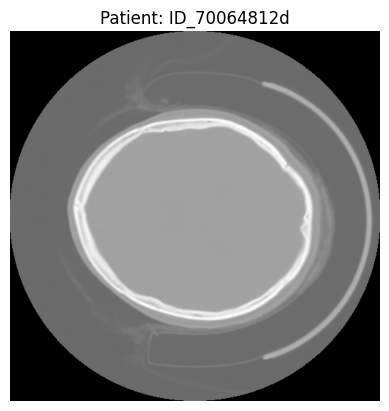

In [19]:
csv_path = "/home/tibia/Projet_Hemorragie/Classification/RSNA2019_Intracranial-Hemorrhage-Detection/2DNet/data/csv/train_fold0.csv"
dicom_dir = "/home/tibia/Projet_Hemorragie/Classification/RSNA2019_Intracranial-Hemorrhage-Detection/2DNet/data/rsna-intracranial-hemorrhage-detection/stage_2_train"

image, meta = load_first_dicom_from_fold0(csv_path, dicom_dir)

print("==== Image Information ====")
print("Image shape:", image.shape)
print("Image dtype:", image.dtype)
print("Image min/max:", image.min().item(), "/", image.max().item())
print("Image mean/std:", image.mean().item(), "/", image.std().item())

print("\n==== Metadata Information ====")
# Toutes les clés dispo :
print("Clés du dictionnaire meta:", list(meta.keys()))
print("Original filename:", meta.get("filename_or_obj", "N/A"))
print("Original shape (avant transform):", meta.get("original_shape", "N/A"))
print("Spacing (pixel spacing):", meta.get("spacing", "N/A"))
print("Orientation (affine):", meta.get("affine"))
print("Patient ID:", meta.get("PatientID", "N/A"))
print("Modality:", meta.get("Modality"))
print("SOPInstanceUID:", meta.get("00280030"))

#plotting
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')
plt.title(f"Patient: {test}")
plt.axis('off')
plt.show()


### Get the extra metadata we dont get with the MONAI loader

In [20]:
import pydicom

def get_extra_dicom_metadata(dcm_path):
    dcm = pydicom.dcmread(dcm_path) # read_file doesnt work with pydicom 2.0+
    meta = {
        "SOPInstanceUID": getattr(dcm, "SOPInstanceUID", None),
        "WindowCenter": getattr(dcm, "WindowCenter", None),
        "WindowWidth": getattr(dcm, "WindowWidth", None),
        "RescaleIntercept": getattr(dcm, "RescaleIntercept", None),
        "RescaleSlope": getattr(dcm, "RescaleSlope", None),
    }
    return meta

csv_path = "/home/tibia/Projet_Hemorragie/Classification/RSNA2019_Intracranial-Hemorrhage-Detection/2DNet/data/csv/train_fold0.csv"
dicom_dir = "/home/tibia/Projet_Hemorragie/Classification/RSNA2019_Intracranial-Hemorrhage-Detection/2DNet/data/rsna-intracranial-hemorrhage-detection/stage_2_train"
dcm_path= get_first_dicom_path(csv_path, dicom_dir)

extra_meta = get_extra_dicom_metadata(dcm_path)

print("UID:", extra_meta["SOPInstanceUID"])
print("Window Center:", extra_meta["WindowCenter"])
print("Window Width:", extra_meta["WindowWidth"])

UID: ID_70064812d
Window Center: 30
Window Width: 80


/home/tibia/Projet_Hemorragie/hemorragie-env/lib/python3.12/site-packages/pydicom/valuerep.py:440: UserWarning: Invalid value for VR UI: 'ID_70064812d'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warn_and_log(msg)


30
80
1
-1024


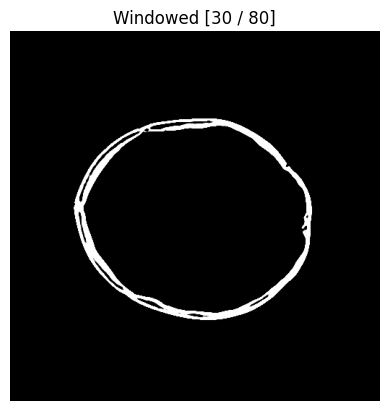

In [21]:
import numpy as np

def window_image(img, center, width):
    img_min = center - width // 2
    img_max = center + width // 2
    img = np.clip(img, img_min, img_max)
    return img

# On récupère les infos DICOM manuellement
dicom_raw = pydicom.dcmread(str(dcm_path))
center = dicom_raw.WindowCenter
print(center)
width = dicom_raw.WindowWidth
print(width)
slope = dicom_raw.RescaleSlope
print(slope)
intercept = dicom_raw.RescaleIntercept
print(intercept)

img_np = image.numpy()  
img_np = img_np * slope + intercept
img_windowed = window_image(img_np, int(center), int(width))

plt.imshow(img_windowed, cmap="gray")
plt.title(f"Windowed [{center} / {width}]")
plt.axis('off')
plt.show()

In [ ]:
import monai.transforms as T
import torch
# Normalisation de l'image


img_windowed_norm = torch.from_numpy((img_windowed - img_windowed.min()) / (img_windowed.max() - img_windowed.min())).unsqueeze(0) # [1, H, W]
#Adapt shape for MONAI, putting channel first

resize_transform = T.Resize((224, 224))
print( img_windowed_norm.shape)
print (resize_transform.dtype)
resized_tensor = resize_transform(img_windowed_norm)  # [1, 1, H, W]
print (resized_tensor.shape)
plt.imshow(resized_tensor[0].numpy(), cmap='gray')
plt.title("Image normalisée et redimensionnée (224x224)")
plt.axis('off')
plt.show()

RuntimeError: applying transform <monai.transforms.utility.array.EnsureChannelFirst object at 0x7f3a68ebf170>